In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

FIGSIZE = 20, 10

In [2]:
df_tv = pd.read_csv('data/train.csv')
df_tt = pd.read_csv('data/test.csv')

df_tv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df_tv.Pclass = df_tv.Pclass.map({1: 'one', 2: 'two', 3: 'three'})
df_tt.Pclass = df_tt.Pclass.map({1: 'one', 2: 'two', 3: 'three'})
df_tv.drop('Ticket', axis=1, inplace=True)
df_tt.drop('Ticket', axis=1, inplace=True)

In [4]:
df_tv.describe(include='number')

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_tv.describe(include='object')

,Pclass,Name,Sex,Cabin,Embarked
count,891,891,891,204,889
unique,3,891,2,147,3
top,three,"Braund, Mr. Owen Harris",male,B96 B98,S
freq,491,1,577,4,644


In [6]:
print(df_tv.isna().sum())
print('*' * 50)
print(df_tt.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
df_tv.mode().iloc[0]

PassengerId                      1
Survived                       0.0
Pclass                       three
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [8]:
df_tv.Cabin = df_tv.Cabin.apply(lambda x: np.nan if x is np.nan else x[0])
df_tt.Cabin = df_tt.Cabin.apply(lambda x: np.nan if x is np.nan else x[0])

df_tv['Title'] = df_tv.Name.apply(lambda x: x.split(', ')[1].split()[0][:-1])
df_tt['Title'] = df_tt.Name.apply(lambda x: x.split(', ')[1].split()[0][:-1])

df_tv.Title = df_tv.Title.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Others')
df_tt.Title = df_tt.Title.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Others')

df_tv.drop('Name', axis=1, inplace=True)
df_tt.drop('Name', axis=1, inplace=True)

In [9]:
df_tv.fillna(df_tv.mode().iloc[0], inplace=True)
df_tt.fillna(df_tv.mode().iloc[0], inplace=True)

In [10]:
df_tv['FamilySize'] = df_tv.SibSp + df_tv.Parch + 1
df_tt['FamilySize'] = df_tt.SibSp + df_tt.Parch + 1

df_tv.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_tt.drop(['SibSp', 'Parch'], axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

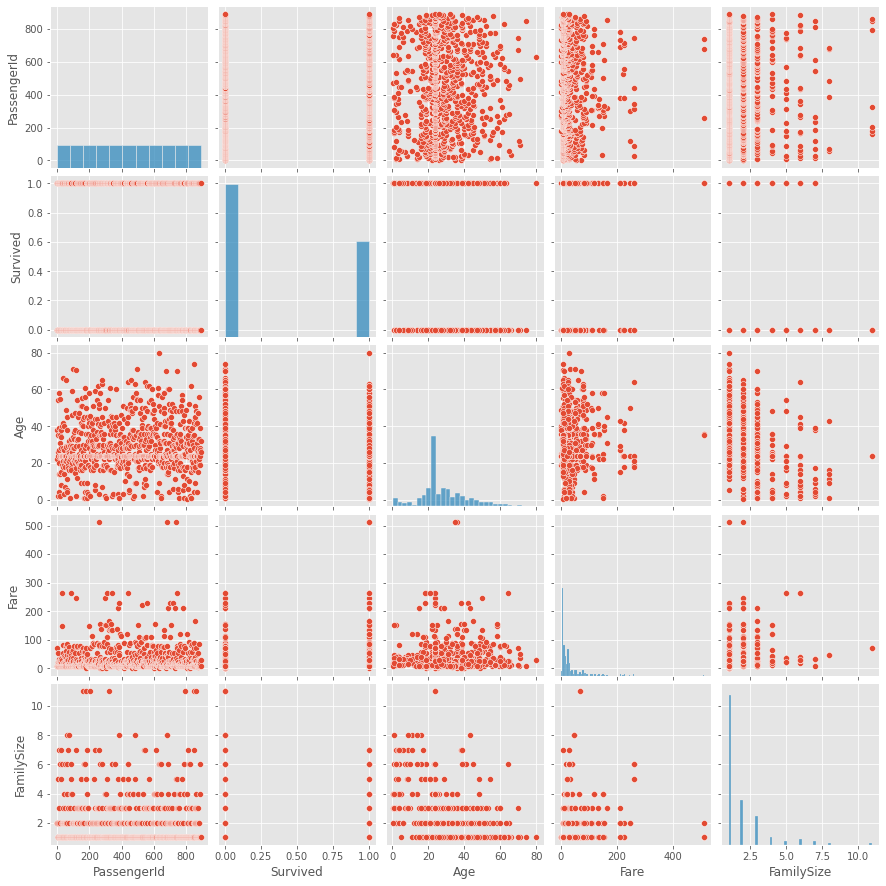

In [11]:
plt.figure(figsize=FIGSIZE)
sns.pairplot(df_tv)

In [12]:
df_tv['LogFare'] = np.log10(df_tv.Fare+1)
df_tt['LogFare'] = np.log10(df_tt.Fare+1)
df_tv.drop('Fare', axis=1, inplace=True)
df_tt.drop('Fare', axis=1, inplace=True)

In [13]:
ohe = OneHotEncoder(drop='first')
cat_columns = df_tv.select_dtypes(include='object').columns
ohe.fit(df_tv[cat_columns])
enc_columns = ohe.get_feature_names_out().tolist()
df_tv[enc_columns] = ohe.transform(df_tv[cat_columns]).toarray()
df_tt[enc_columns] = ohe.transform(df_tt[cat_columns]).toarray()
df_tv.drop(cat_columns, axis=1, inplace=True)
df_tt.drop(cat_columns, axis=1, inplace=True)

In [14]:
df_tv.var()

PassengerId     66231.000000
Survived            0.236772
Age               174.228695
FamilySize          2.603248
LogFare             0.177117
Pclass_three        0.247670
Pclass_two          0.164047
Sex_male            0.228475
Cabin_B             0.050023
Cabin_C             0.136408
Cabin_D             0.035705
Cabin_E             0.034664
Cabin_F             0.014394
Cabin_G             0.004474
Cabin_T             0.001122
Embarked_Q          0.079040
Embarked_S          0.199586
Title_Miss          0.162723
Title_Mr            0.243834
Title_Mrs           0.120746
Title_Others        0.029418
dtype: float64

In [16]:
df_tv.head()

,PassengerId,Survived,Age,FamilySize,LogFare,Pclass_three,Pclass_two,Sex_male,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1,0,22.0,2,0.916454,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,38.0,2,1.859038,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,26.0,1,0.950608,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,35.0,2,1.733197,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,35.0,1,0.956649,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
df_tv.set_index('PassengerId')
df_tt.set_index('PassengerId')
df_tv = df_tv / df_tv.max()
df_tt = df_tt / df_tt.max()

In [18]:
df_tv.var()

PassengerId     0.083427
Survived        0.236772
Age             0.027223
FamilySize      0.021514
LogFare         0.024110
Pclass_three    0.247670
Pclass_two      0.164047
Sex_male        0.228475
Cabin_B         0.050023
Cabin_C         0.136408
Cabin_D         0.035705
Cabin_E         0.034664
Cabin_F         0.014394
Cabin_G         0.004474
Cabin_T         0.001122
Embarked_Q      0.079040
Embarked_S      0.199586
Title_Miss      0.162723
Title_Mr        0.243834
Title_Mrs       0.120746
Title_Others    0.029418
dtype: float64

In [19]:
df_tv.head()

,PassengerId,Survived,Age,FamilySize,LogFare,Pclass_three,Pclass_two,Sex_male,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0.001122,0.0,0.2750,0.181818,0.338125,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.002245,1.0,0.4750,0.181818,0.685892,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.003367,1.0,0.3250,0.090909,0.350727,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.004489,1.0,0.4375,0.181818,0.639463,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.005612,0.0,0.4375,0.090909,0.352955,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_tv.to_csv('data/train_preprocessed.csv')
df_tt.to_csv('data/test_preprocessed.csv')